# Regressão

Esse projeto tem como objetivo rodar diferentes algoritmos de regressão e selecionar o que melhor desempenha predições na base de dados.

Para esse fim, o projeto se divide nos seguintes tópicos:

I) Uma variável preditora

1. Regressão liner simples
2. Regressão polinomial
3. Avaliação dos modelos

II) Múltiplas variáveis preditoras

4. Regressão linear múltipla 
5. Padronização
6. Regularização
7. Árvore de decisão
9. Avaliação dos modelos 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.datasets import make_regression
from sklearn import tree
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [2]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [3]:
df = pd.read_csv('desafio.csv', sep=',')
df.head()

,order_id,code,quantity,price,pis_cofins,icms,tax_substitution,category,liquid_cost,order_status,capture_date,process_date,process_status,source_channel
0,bcb59c839e78b2601374cbad9239ca7b,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,0.0000,191.8416,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,2016-06-11,2016-06-11,processado,b76eb9b8fc0f17098812da9117d3e500
1,4e91ee6b95895771dc9ee524e910a902,e6762ba2ffbca07ab6cee7551caeaad5,1,1036.29,95.8568,176.1693,0.0000,4ece547755cba9e7fc14125bc895f31b,542.7065,em rota de entrega,2016-06-11,2016-06-11,processado,b76eb9b8fc0f17098812da9117d3e500
2,88eb0ac86af1a521c0831298d22dea8b,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,0.0000,191.8416,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,2016-06-12,2016-06-12,processado,b76eb9b8fc0f17098812da9117d3e500
3,dee418152a36314b4aee6ce9cf94fcbf,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,176.2020,0.0000,4ece547755cba9e7fc14125bc895f31b,542.7065,cancelado,2016-06-13,0000-00-00,captado,b76eb9b8fc0f17098812da9117d3e500
4,1c175bc61b9b659bbf011b2e5e3dcec6,e6762ba2ffbca07ab6cee7551caeaad5,1,976.05,90.2846,0.0000,192.3325,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,2016-06-13,2016-06-13,processado,b76eb9b8fc0f17098812da9117d3e500


In [4]:
df.shape

(179149, 14)

In [5]:
df.dtypes

order_id             object
code                 object
quantity              int64
price               float64
pis_cofins          float64
icms                float64
tax_substitution    float64
category             object
liquid_cost         float64
order_status         object
capture_date         object
process_date         object
process_status       object
source_channel       object
dtype: object

# 1. Regressão linear simples

Esse tópico tem o objetivo de rodar um modelo de regressão linear simples. O modelo é composto pela variável preditora (preço) e pela variável resposta (quantidade).

Após rodar o modelo, realiza-se a previsão de novos valores para realizar a avaliação do modelo. O modelo se mostra relevante e vai ser comparado com um modelo de regressão polinomial no tópico 3.

In [52]:
# como avaliar quando os índices são iguais?

<AxesSubplot:xlabel='price', ylabel='quantity'>

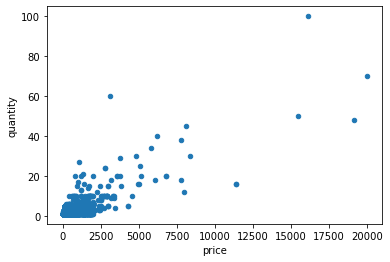

In [6]:
df.plot.scatter(x='price', y='quantity')

In [7]:
features = df.loc[:, ['price', 'quantity']]
price = features.iloc[:, :-1].values
quantity = features.iloc[:, 1].values

In [8]:
x_train, x_test, y_train, y_test = train_test_split(price.reshape(-1, 1), quantity.reshape(-1, 1), test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(143319, 1)
(143319, 1)
(35830, 1)
(35830, 1)


In [9]:
model = LinearRegression().fit(x_train, y_train)

In [10]:
r_sq = model.score(x_train, y_train)
r_sq

0.37134681143973214

In [11]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: [0.60706837]
slope: [[0.00191003]]


In [12]:
y_pred = model.predict(x_train)
print('predicted response:', y_pred, sep='\n')
y_pred.shape

predicted response:
[[0.96789131]
 [1.24196088]
 [0.91248146]
 ...
 [0.86474992]
 [1.25533106]
 [0.9600411 ]]


(143319, 1)

In [13]:
y_pred = y_pred[:35830]
y_pred.shape

(35830, 1)

In [14]:
regression_results(y_test, y_pred)

explained_variance:  -0.2907
mean_squared_log_error:  0.0281
r2:  -0.2907
MAE:  0.2334
MSE:  0.4969
RMSE:  0.7049


In [15]:
index = np.arange(35830)
pred_df = pd.DataFrame(index)
pred_df['y_test'] = y_test
pred_df['y_pred'] = y_pred
pred_df = pred_df.drop(columns=[0])
pred_df.head()

,y_test,y_pred
0,1,0.967891
1,1,1.241961
2,1,0.912481
3,1,0.771884
4,1,1.752702


<AxesSubplot:>

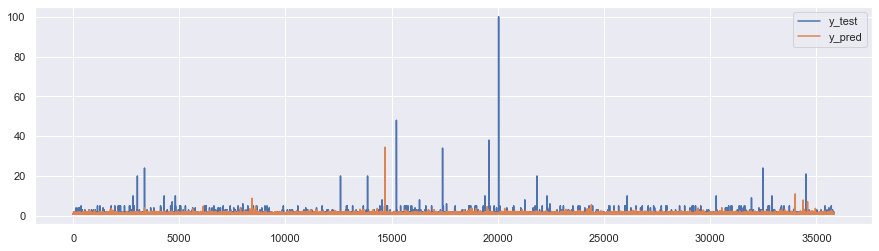

In [61]:
sns.set(rc={'figure.figsize':(15, 4)})
pred_df.plot()

# Regressão polinomial

Quando as variáveis não possuem relações lineares entre si, o modelo de regressão polinomial pode ser uma forma de conseguir ajustar modelos de reta curvilínea.

Aqui, aplica-se o modelo de regressão polinomial para entender a influência do preço dos produtos na quantidade vendida.

Quanto maior o grau usado no modelo, mais curvada é a reta de regressão. A seleção do grau mais adequado às variáveis pode ser feita testando diferentes graus de forma ascendente (começando pelo 1) ou de forma descendente (começando pelo 10). Como geralmente problemas se adequam melhor a graus 1 ou 2, aqui opta-se pelo modelo ascendente.

Ao criar modelos de grau 1 e 2, percebe-se que o modelo de grau 1 tem menor índice de erro (RMSE), por isso ele se adequa melhor aos dados. O modelo será comparado com o de regressão linear simples no próximo tópico.

In [53]:
# escolher o modelo 1 mesmo que o 2 tenha um erro só um pouquinho maior?

In [16]:
degree=1
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(x_train, y_train)
X_seq = np.linspace(x_train.min(),x_train.max(),300).reshape(-1,1)

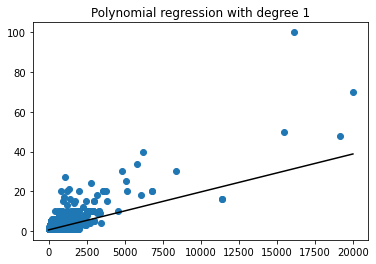

In [17]:
plt.figure()
plt.scatter(x_train, y_train)
plt.plot(X_seq, polyreg.predict(X_seq), color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

In [18]:
y_pred = polyreg.predict(x_train)
y_pred = y_pred[:35830]
regression_results(y_test, y_pred)

explained_variance:  -0.2907
mean_squared_log_error:  0.0281
r2:  -0.2907
MAE:  0.2334
MSE:  0.4969
RMSE:  0.7049


In [19]:
degree=2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(x_train, y_train)
X_seq = np.linspace(x_train.min(),x_train.max(),300).reshape(-1,1)

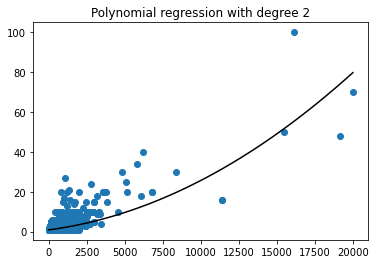

In [20]:
plt.figure()
plt.scatter(x_train,y_train)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

In [21]:
y_pred = polyreg.predict(x_train)
y_pred = y_pred[:35830]
regression_results(y_test, y_pred)

explained_variance:  -0.2238
mean_squared_log_error:  0.0192
r2:  -0.2238
MAE:  0.1579
MSE:  0.4712
RMSE:  0.6864


# 3. Regressão linear simples vs. Regressão Polinomial

Aqui, faz-se uma comparação dos resultados obtidos pelo modelo de regressão linear simples e pelo de regressão linear com grau 1.

Regressão linear simples:
r2:  -0.1639
MAE:  0.215
MSE:  0.7146
RMSE:  0.8453

Regressão polinomial:
r2:  -0.1639
MAE:  0.215
MSE:  0.7146
RMSE:  0.8453

Ambos os modelos apresentam resultados iguais, portanto, não é possível afirmar que um modelo é melhor preditor que outro.

# 4. Regressão linear múltipla

Esse tópico tem o objetivo de rodar um modelo de regressão linear múltipla em que a variável resposta é preço e as variáveis preditoras são: custo líquido, taxas, icms e pis.

O modelo será rodade sem uma prévia padronização dos dados.

In [87]:
X = df[['liquid_cost', 'tax_substitution', 'icms', 'pis_cofins']]
y = df[['price']]

In [88]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(143319, 4)
(143319, 1)
(35830, 4)
(35830, 1)


In [89]:
regr = linear_model.LinearRegression().fit(x_train, y_train)

In [90]:
print(regr.coef_)

[[0.09810074 2.17874669 2.4797296  6.03405819]]


In [91]:
y_pred = regr.predict(x_train)
y_pred = y_pred[:35830]
y_pred.shape

(35830, 1)

In [92]:
regression_results(y_test, y_pred)

explained_variance:  -1.0364
mean_squared_log_error:  0.7019
r2:  -1.0364
MAE:  148.5481
MSE:  59490.0582
RMSE:  243.9058


# 5. Padronização

O mesmo modelo do tópico 4 é aplicado no tópico 5, com a diferença de que, desta vez, os dados serão padronizados antes para que a média seja 0 e o desvio padrão 1.

Ao comparar os dois modelos, percebe-se que o modelo padronizado performa melhor, pois tem um maior r² e menores índices de erro. Portanto, os próximos modelos de regressão serão rodados com os dados já padronizados.

Também testa-se, aqui, se há multicolinearidade nas variáveis preditoras. Caso que, se positivo, pode atrapalhar a interpretação do modelo. Como a matrix de correlação não mostra correlações altas e o FIV (fator de inflação da variância) não é maior que 10, interpreta-se que as variáveis não possuem multicolinearidade entre si.

In [93]:
scaler = StandardScaler()
transformed_x = scaler.fit_transform(X)
transformed_x
df_X = pd.DataFrame(transformed_x)
df_X.head()

,0,1,2,3
0,4.864318,6.185442,-0.776156,4.081130
1,4.864318,-0.635451,4.672413,4.386167
2,4.864318,6.185442,-0.776156,4.081130
3,4.864318,-0.635451,4.673424,4.081130
4,4.864318,6.202896,-0.776156,4.065977


# 5.1 Multicolinearidade

In [94]:
corr_x = df_X.corr()

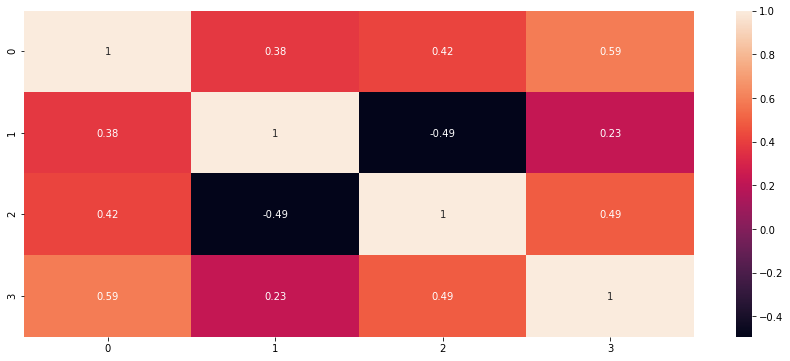

In [95]:
plt.figure(figsize=(15, 6))
sns.heatmap(corr_x, annot=True)
plt.show()

In [96]:
vif = [variance_inflation_factor(df_X.values, i) for i in range(df_X.shape[1])]
vif

[2.7329583509512276, 3.707924657328653, 4.343892112618155, 2.1622387921649446]

# 5.2 Modelo padronizado

In [97]:
X = df_X

In [98]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(143319, 4)
(143319, 1)
(35830, 4)
(35830, 1)


In [99]:
regr = linear_model.LinearRegression().fit(x_train, y_train)

In [100]:
y_pred = regr.predict(x_train)
y_pred = y_pred[:35830]
y_pred.shape

(35830, 1)

In [101]:
regression_results(y_test, y_pred)

explained_variance:  -1.1317
mean_squared_log_error:  0.714
r2:  -1.1318
MAE:  149.4967
MSE:  56029.0584
RMSE:  236.7046


# 6. Regularização

Como o objetivo do projeto é testar diferentes modelos de regressão nos dados, esse tópico tem o objetivo de aplicar regressões lineares múltiplas com índices de regularização.

Para isso, divide-se o tópico nos seguintes subtópicos:

* 6.1 Ridge
* 6.2 Lasso
* 6.3 ElasticNet

Apesar dos dois primeiros modelos terem resultados bem parecidos, o modelo de Lasso possui um menor RMSE, por isso, ele é selecionado como melhor ajustado.

In [51]:
# elasticnet não está funcionando
# como avaliar quando os índices do modelo são muito similares?

# 6.1 Ridge

In [39]:
regr_ridge = Ridge(alpha=1.0)
regr_ridge = regr_ridge.fit(x_train, y_train)

In [40]:
y_pred = regr_ridge.predict(x_train)
y_pred = y_pred[:35830]
y_pred.shape

(35830, 1)

In [41]:
regression_results(y_test, y_pred)

explained_variance:  -0.8368
mean_squared_log_error:  0.6885
r2:  -0.8369
MAE:  145.9643
MSE:  60331.1399
RMSE:  245.624


# 6.2 Lasso

In [103]:
regr_lasso = Lasso(alpha=1.0)
regr_lasso = regr_lasso.fit(x_train, y_train)

In [104]:
y_pred = regr_lasso.predict(x_train)
y_pred = y_pred[:35830]
y_pred.shape

(35830,)

In [105]:
regression_results(y_test, y_pred)

explained_variance:  -1.1119
mean_squared_log_error:  0.7027
r2:  -1.112
MAE:  148.9258
MSE:  55507.3899
RMSE:  235.6001


# 6.3 ElasticNet 

In [45]:
x_train, y_train = make_regression(n_features=4, random_state=0)

In [46]:
regr_en = ElasticNet(random_state=0)
regr_en = regr_en.fit(x_train, y_train)

In [50]:
# está diminnuindo o número de valores de previsão
y_pred = regr_en.predict(x_train)
y_pred.shape

(100,)

In [49]:
#regression_results(y_test, y_pred)

# 7. Árvore de decisão

Esse tópico tem o objetivo de trabalhar com árvores de decisão. Para isso, roda-se um modelo de árvore de decisão tradicional e um modelo com XGBoost.

Para modelos de árvore, não se utiliza os dados padronizados, porque cada nodo lida com apenas uma variável. Portanto, a diferença de escala entre as variáveis não diferencia os resultados.

Além de plotar os modelos, usa-se a função feature_importances_ para verificar a relevância de cada variável no modelo. Pelos resultados, a variável 'tax_substitution' com certeza poderia ser excluída do modelo.

O modelo de árvore de decisão tradicional apresenta resultados muito melhores, porém, é necessário verificar se o modelo não está com overfitting.

# 7.1 Árvore de decisão tradicional

In [73]:
regr_tree = tree.DecisionTreeRegressor()
regr_tree = regr_tree.fit(x_train, y_train)

In [74]:
allScores = cross_val_score(regr_tree, X, y, cv=10)
print(allScores)
allScores.mean()

[ 0.99940751  0.99840028  0.99694754  0.99687939  0.99421183  0.97014138
  0.92587769 -1.10438024  0.93466991  0.98356606]


0.7695721347450657

In [75]:
y_pred = regr_tree.predict(x_test)
regression_results(y_test, y_pred)

explained_variance:  0.9362
mean_squared_log_error:  0.0022
r2:  0.9362
MAE:  1.8082
MSE:  2594.4931
RMSE:  50.9362


In [76]:
regr_tree.feature_importances_

array([0.11693804, 0.00180373, 0.02987575, 0.85138248])

In [20]:
# testar se não está com overfitting

# 7.2 XGBoost

In [69]:
regr_xgb = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
regr_xgb = regr_xgb.fit(x_train, y_train)

In [70]:
y_pred = regr_xgb.predict(x_test)

In [71]:
regr_xgb.feature_importances_

array([0.24552654, 0.        , 0.20269765, 0.5517758 ], dtype=float32)

In [72]:
regression_results(y_test, y_pred)

explained_variance:  0.5759
mean_squared_log_error:  0.1796
r2:  0.4085
MAE:  83.8603
MSE:  24052.4696
RMSE:  155.0886


# 8. Avaliação dos modelos

Esse tópico tem o objetivo de comparar os modelos de regressão com múltiplas variáveis preditoras.

Abaixo, apresenta-se os resultados dos modelos que apresentaram o melhor desempenho e serão comparados:

Regressão linear múltipla com dados padronizados:

explained_variance:  -0.8369
mean_squared_log_error:  0.6885
r2:  -0.8369
MAE:  145.9645
MSE:  60331.4078
RMSE:  245.6245

Regressão de Lasso:

explained_variance:  -0.8223
mean_squared_log_error:  0.6773
r2:  -0.8223
MAE:  145.4215
MSE:  59852.5686
RMSE:  244.6478

Árvore de decisão tradicional:

explained_variance:  0.9362
mean_squared_log_error:  0.0022
r2:  0.9362
MAE:  1.807
MSE:  2594.3799
RMSE:  50.9351

Dos três modelos, o que apresente melhores índices é a árvore de decisão tradicional. Ainda assim, é preciso verificar se o modelo está conseguindo generalizar a base de dados.

In [108]:
# como interpreto os gráficos? as previsões tão bem diferentes e árvore não parece estar com overfitting

<AxesSubplot:>

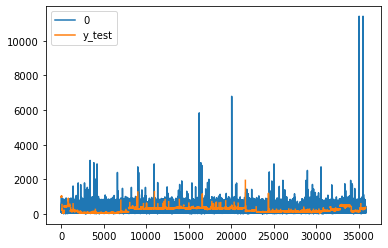

In [86]:
df_tree = pd.DataFrame(y_pred)
df_tree['y_test'] = y_test['price']
df_tree.plot()

<AxesSubplot:>

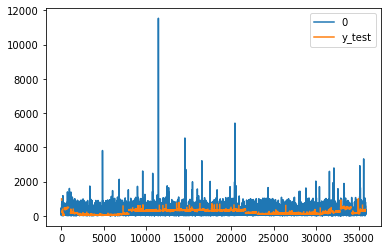

In [102]:
df_padr = pd.DataFrame(y_pred)
df_padr['y_test'] = y_test['price']
df_padr.plot()

<AxesSubplot:>

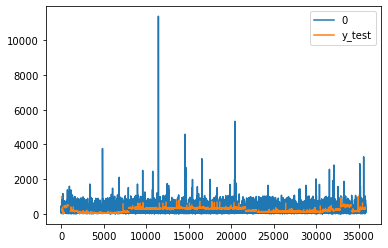

In [106]:
df_lasso = pd.DataFrame(y_pred)
df_lasso['y_test'] = y_test['price']
df_lasso.plot()

# Referências

https://medium.com/analytics-vidhya/linear-regression-in-python-with-scikit-learn-e1bb8a059cd2

https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2

https://www.w3schools.com/python/python_ml_multiple_regression.asp